# Descripción del problema

Los datos provienen de una planta minera.
El objetivo principal de estos datos es poder predecir la impureza en el concentrado de mineral extraído. Esta impureza es medida cada hora. Con las predicciones podríamos ayudar a los ingenieros con una alerta temprana para que puedan tomar acciones correctivas. 


- `% Silica Concentrate` es la concentración de sílice (laboratorio).
- `% Iron Concentrate` es la concentración de hierro (laboratorio).
- El concentrado de sílice es la impureza en el mineral de hierro que debe eliminarse.
- El proceso actual de detección de sílice lleva muchas horas.


Con la ayuda de algunos análisis y modelos de datos, podemos dar una buena aproximación del concentrado de sílice que reducirá mucho tiempo y esfuerzos necesarios para procesar el mineral de hierro


Fuente:
https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process


## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

## Lectura de datos

In [2]:
df = pd.read_csv('data/MiningProcess_Flotation_Plant_Database.csv', decimal=",").drop_duplicates()

In [3]:
df = df.drop(["date","% Iron Concentrate"],axis = 1)

In [4]:
df = df.sample(10000)

In [5]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
74906,56.39,13.53,2375.22,415.4590,399.573000,9.60687,1.533899,250.021,252.054,249.486,...,249.648,251.731,582.771,582.230000,592.781,340.147,451.176,398.845,453.837,1.850000
602057,48.81,25.31,3849.61,542.7550,376.904000,9.10344,1.738280,300.172,294.988,301.410,...,296.133,301.046,495.540,501.191000,580.054,344.797,361.113,336.163,345.854,2.160000
536132,57.46,10.80,4765.83,523.4120,400.374000,9.80745,1.739550,247.541,245.675,249.829,...,290.162,303.223,417.908,826.892584,427.393,482.255,546.239,455.066,478.252,2.190000
721056,55.88,12.82,4494.34,658.4195,417.792444,9.62727,1.679040,300.806,305.640,302.124,...,307.617,289.819,397.888,390.820000,390.635,396.484,343.688,341.636,296.846,3.570000
132053,55.17,14.35,2249.37,440.4910,394.747000,9.58050,1.608480,246.717,250.810,249.626,...,248.104,247.835,640.499,590.026000,496.215,438.873,497.035,366.967,403.969,5.062227


In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,56.192767,14.802066,2873.797370,488.354668,397.449467,9.765368,1.680731,279.897813,276.970282,280.719646,...,292.035786,290.413680,522.162786,524.585534,531.551401,419.744613,424.371997,429.233485,420.979215,2.320942
std,5.205310,6.860311,1207.230577,91.511891,9.737300,0.384915,0.069014,29.783614,30.158966,28.844554,...,30.093568,28.668294,131.309693,128.236905,151.699294,91.287551,83.733676,88.917901,84.718500,1.131567
min,42.740000,1.310000,0.823198,242.020963,376.257000,8.753391,1.519833,175.785225,177.301266,176.833645,...,192.881614,186.120615,149.911026,212.167000,126.636000,162.654800,169.219000,161.979300,175.617000,0.600000
25%,52.610000,8.990000,2085.494746,430.508500,394.170250,9.521947,1.647878,250.269000,250.519250,250.784000,...,257.510750,254.665250,417.154750,442.880750,410.261000,356.888000,357.233500,357.371500,356.248750,1.430000
50%,55.990000,14.180000,3014.740000,504.964000,399.178500,9.796740,1.698240,299.320000,296.097500,298.662500,...,299.487000,298.956500,493.848000,496.956000,494.596500,410.479500,407.779000,423.106000,411.057500,1.970000
75%,59.720000,20.140000,3735.477500,554.212750,402.839000,10.029025,1.728420,300.146000,300.586000,300.378500,...,303.301000,301.835000,595.014250,596.471250,601.861500,484.836250,481.668000,491.504000,475.618250,2.990000
max,65.780000,33.400000,6293.501878,738.843903,418.631000,10.807783,1.853132,348.582000,374.771000,360.586000,...,370.840000,370.695000,862.229000,828.444300,886.734000,679.817000,674.949000,698.602708,659.499739,5.530000


## Preparación de datos

In [7]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

In [8]:
scaler_X = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler_X.fit_transform(X),columns=X.columns)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [10]:
def plot(y_train,y_train_hat,y_test,y_test_hat):
    #Definimos los limites de la  grafica
    plt.figure(figsize=(10,10))
    plt.axis([0,1,0,1])
    plt.plot([[0,0],[1,1]], "r--")
    #Grafica de dispersión (Real vs predicción)
    plt.scatter(y_train,y_train_hat, label="Entrenamiento",alpha=0.8)
    plt.scatter(y_test,y_test_hat, label="Prueba", alpha=0.8)
    #Preparamos las etiquetas
    plt.legend()
    plt.xlabel("Y Real")
    plt.ylabel("Y Predicción")
    #Calculamos error cuadrático medio
    error = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)),
                               scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)))
    print("El error cuadrático medio es {}".format(error))

## Regresión Lineal

In [11]:
from sklearn.linear_model import LinearRegression
#Creando el modelo y entrenando
reg = LinearRegression().fit(X_train,y_train)
#Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)
#Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

El error cuadrático medio es 1.08154625930753


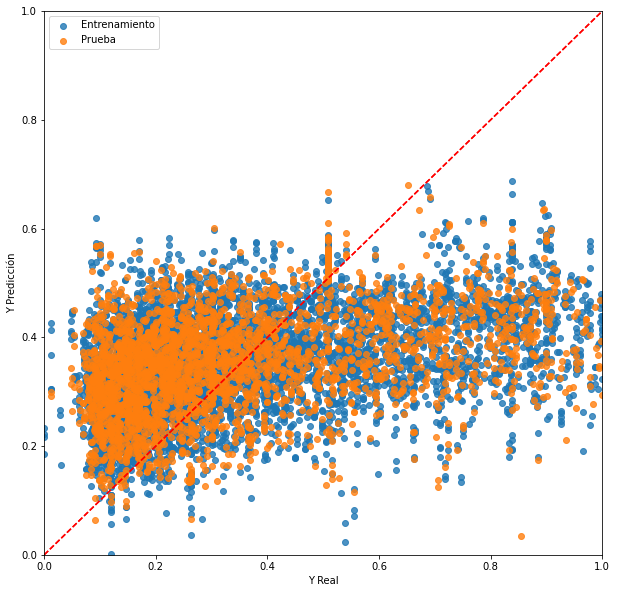

In [12]:
plot(y_train,y_train_hat,y_test,y_test_hat)

## SVR

El error cuadrático medio es 1.0359475274797885


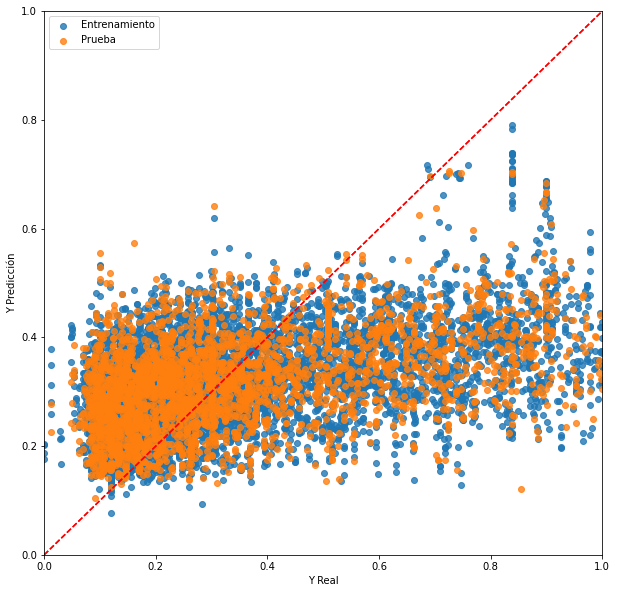

In [13]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_rbf.predict(X_train)
#Prediciendo valores de validación
y_test_hat = svr_rbf.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)


El error cuadrático medio es 1.0822090950830128


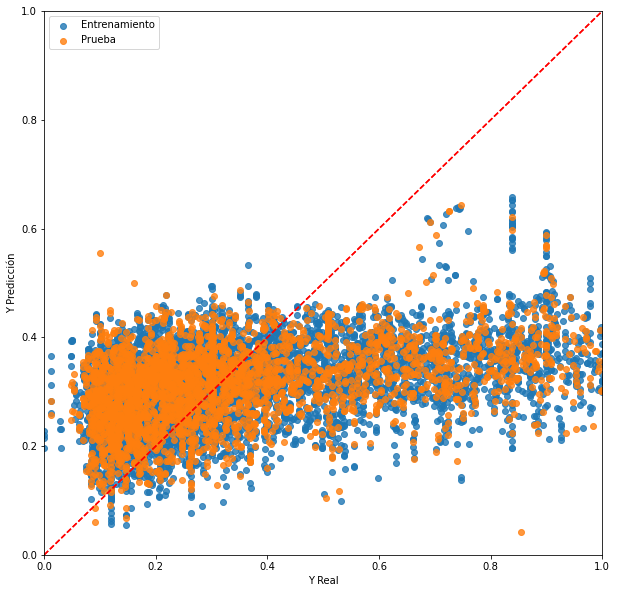

In [14]:
svr_poly = SVR(kernel='poly', gamma='auto')
svr_poly.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_poly.predict(X_train)
#Prediciendo valores de validación
y_test_hat = svr_poly.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

## Arbol de decisión

El error cuadrático medio es 0.9676960316016123


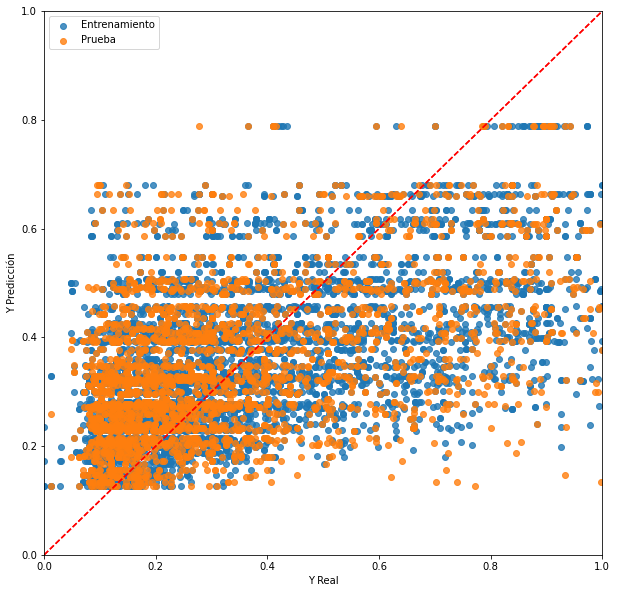

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=12,min_samples_leaf=50)
tree.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = tree.predict(X_train)
#Prediciendo valores de validación
y_test_hat = tree.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)



# Selección de variables

In [16]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, 8, step=1)
selector = selector.fit(X_train, y_train.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [17]:
X_train_reduced = X_train.loc[:, selector.support_]
X_test_reduced = X_test.loc[:, selector.support_]
X_train_reduced.head()

,Amina Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 07 Air Flow,Flotation Column 05 Level
8621,0.540837,0.476978,0.602723,0.712032,0.667433,0.555917,0.603016,0.655383
7631,0.542968,0.649442,0.600563,0.438803,0.399284,0.146519,0.349986,0.588885
1561,0.460464,0.595631,0.404222,0.434995,0.412225,0.529601,0.597192,0.331440
2483,0.541716,0.190238,0.539056,0.428502,0.399284,0.505390,0.614773,0.357046
4349,0.388790,0.563222,0.706203,0.723513,0.683041,0.448709,0.618967,0.425575


El error cuadrático medio es 1.0492134242138949


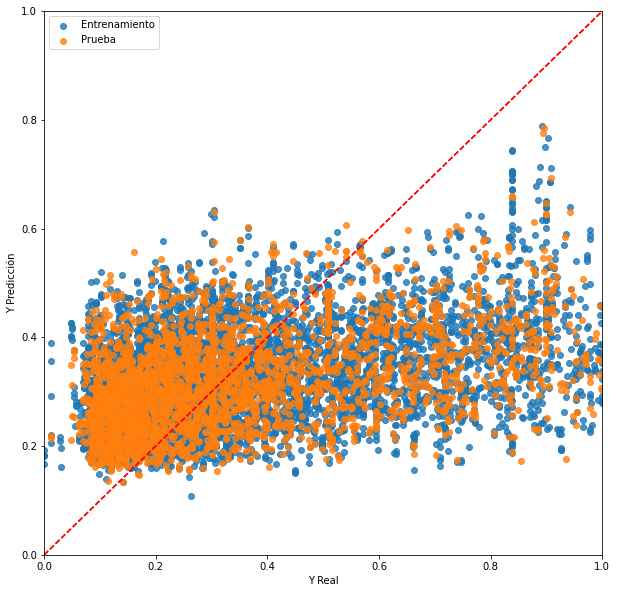

In [18]:
svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train_reduced,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_rbf.predict(X_train_reduced)
#Prediciendo valores de validación
y_test_hat = svr_rbf.predict(X_test_reduced)

plot(y_train,y_train_hat,y_test,y_test_hat)


# Métodos de ensamble

Los métodos de ensamble de modelos utilizan múltiples algoritmos de aprendizaje para obtener un mejor rendimiento predictivo que el que se podría obtener de cualquiera de los algoritmos de aprendizaje de manera individual.

El error cuadrático medio es 0.6347803173000116


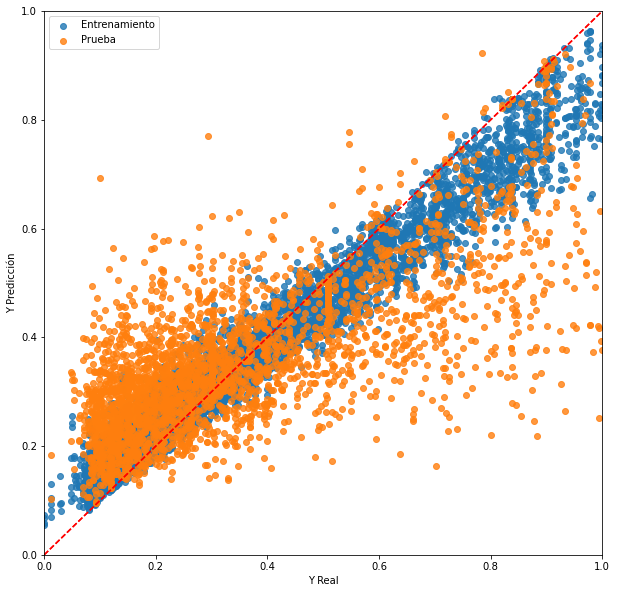

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.ravel())

#Prediciendo valores de entrenamiento
y_train_hat = rf.predict(X_train)
#Prediciendo valores de validación
y_test_hat = rf.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

El error cuadrático medio es 0.6127597747172602


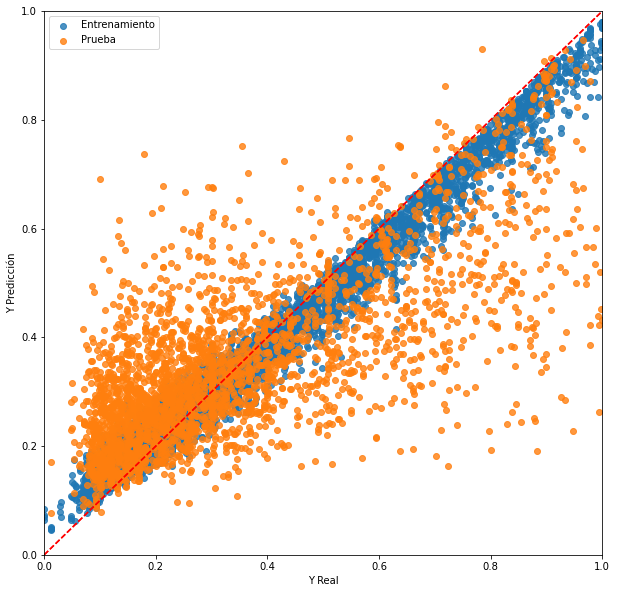

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=40,  max_depth=12, learning_rate=0.1)
gbr.fit(X_train,y_train.ravel())

#Prediciendo valores de entrenamiento
y_train_hat = gbr.predict(X_train)
#Prediciendo valores de validación
y_test_hat = gbr.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)